Importing Data

1. Randomly shuffle the dataset by taking a random seed of “42”. Create a training and testing set
partitions in the ratio of 70% : 30% by taking last 30% rows in the test set. The remaining rows will be
the training set. Make sure that the columns have the same datatypes. Display the mean values for each
columns and the number of samples belonging to each category (admitted and not-admitted)

In [1]:
from google.colab import files

uploaded = files.upload()
import pandas as pd

# Read the data into a DataFrame
df = pd.read_csv('student_marks.txt',names=["marks1","marks2","admitted"])

# Display the DataFrame details
print("DataFrame details:")
print(df.info())

Saving student_marks.txt to student_marks.txt
DataFrame details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marks1    100 non-null    float64
 1   marks2    100 non-null    float64
 2   admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


In [2]:
df

,marks1,marks2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

df_shuffled = df.sample(frac=1, random_state=42)

In [5]:
split_index = int(0.7 * len(df_shuffled))

In [6]:
train_set = df_shuffled.iloc[:split_index]
test_set = df_shuffled.iloc[split_index:]


In [8]:
mean_values = df.mean()
print("Mean Values for Each Column:")
print(mean_values)

category_counts = df['admitted'].value_counts()
print("\nNumber of Samples Belonging to Each Category:")
print(category_counts)

Mean Values for Each Column:
marks1      65.644274
marks2      66.221998
admitted     0.600000
dtype: float64

Number of Samples Belonging to Each Category:
1    60
0    40
Name: admitted, dtype: int64


1. Create a scatter plot using the training set and mark the points differently for different classes

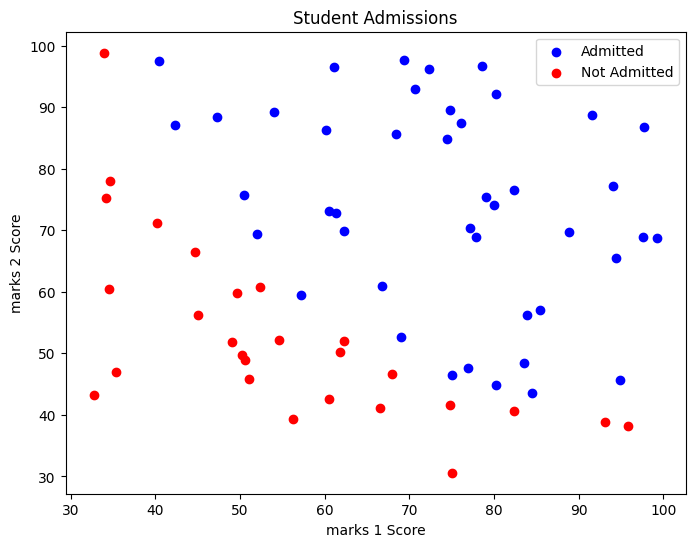

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.figure(figsize=(8, 6))
plt.scatter(train_set[train_set['admitted'] == 1]['marks1'], train_set[train_set['admitted'] == 1]['marks2'], color='blue', label='Admitted')
plt.scatter(train_set[train_set['admitted'] == 0]['marks1'], train_set[train_set['admitted'] == 0]['marks2'], color='red', label='Not Admitted')
plt.title('Student Admissions')
plt.xlabel('marks 1 Score')
plt.ylabel('marks 2 Score')
plt.legend()
plt.show()

 **Classification using Logistic Regression:**
1. Create a class MyLogisticRegression, with the following methods:
a) Hypothesis Function (prediction using sigmoid function) – h_theta_x(self, theta, x)
b) Cost function calculation - cost_function(self, theta, x, y)
c) Gradient function - Same as below:
def gradient(self, theta, x, y):
# Computes the gradient of the cost function at the point theta
m = x.shape[0]
return (1 / m) * np.dot(x.T, sigmoid(np.dot(x, theta)) - y)
d) Create a fit(self, x, y, theta) function that will be used to find the model parameters that
minimize the cost function. Use fmin_tnc function in scipy to minimize the cost function

In [22]:
from scipy.optimize import fmin_tnc

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class MyLogisticRegression:
    def __init__(self):
        pass

    def h_theta_x(self, theta, x):
        return sigmoid(np.dot(x, theta))

    def cost_function(self, theta, x, y):
        m = x.shape[0]
        h = self.h_theta_x(theta, x)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

    def gradient(self, theta, x, y):
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, sigmoid(np.dot(x, theta)) - y)

    def fit(self, x, y, theta):
        opt_weights = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient, args=(x, y.flatten()))
        self.weights = opt_weights[0]

2. Call the fit function on the training set and get the theta parameters

In [12]:
X_train = train_set[['marks1', 'marks2']].values
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
y_train = train_set['admitted'].values.reshape(-1, 1)

X_test = test_set[['marks1', 'marks2']].values
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_test = test_set['admitted'].values.reshape(-1, 1)

model = MyLogisticRegression()
initial_theta = np.zeros((X_train.shape[1], 1))
model.fit(X_train, y_train, initial_theta)

learned_theta = model.weights
print("Learned Theta Parameters:", learned_theta)

Learned Theta Parameters: [-24.66570881   0.19335213   0.21123528]


3. Plot the decision boundary on the previously drawn scatter plot.


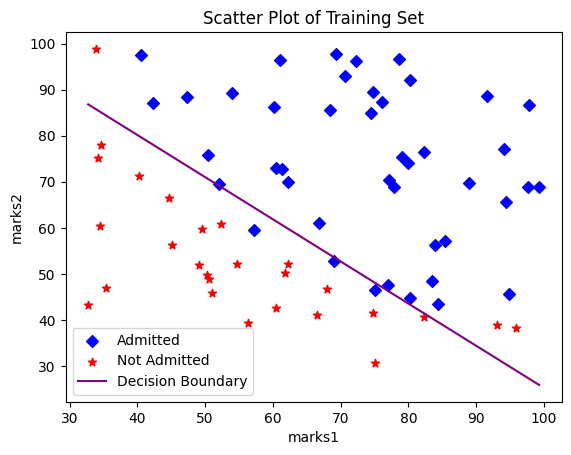

In [13]:
plt.scatter(train_set[train_set['admitted'] == 1]['marks1'], train_set[train_set['admitted'] == 1]['marks2'], color='blue', label='Admitted',marker="D")
plt.scatter(train_set[train_set['admitted'] == 0]['marks1'], train_set[train_set['admitted'] == 0]['marks2'], color='red', label='Not Admitted',marker="*")

plt.xlabel('marks1')
plt.ylabel('marks2')
plt.title('Scatter Plot of Training Set')

x_decision_boundary = np.array([min(X_train[:, 1]), max(X_train[:, 1])])
y_decision_boundary = (-1 / learned_theta[2]) * (learned_theta[1] * x_decision_boundary + learned_theta[0])

plt.plot(x_decision_boundary, y_decision_boundary, color='purple', label='Decision Boundary')

plt.legend()

plt.show()

4. Find the precision, recall and F1-score for the test set. Create separate functions for each (Do not use
inbuilt functions).

In [14]:
def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    if true_positives + false_positives == 0:
        return 0
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    if true_positives + false_negatives == 0:
        return 0
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    if prec + rec == 0:
        return 0
    return 2 * (prec * rec) / (prec + rec)

predictions = model.h_theta_x(learned_theta, X_test)
predictions = (predictions >= 0.5).astype(int)

prec_test = precision(y_test.flatten(), predictions.flatten())
rec_test = recall(y_test.flatten(), predictions.flatten())
f1_test = f1_score(y_test.flatten(), predictions.flatten())

print("Test Set Precision:", prec_test)
print("Test Set Recall:", rec_test)
print("Test Set F1-score:", f1_test)

Test Set Precision: 0.8421052631578947
Test Set Recall: 0.9411764705882353
Test Set F1-score: 0.8888888888888888


5.Create more columns in the dataframes (training and test) corresponding to higher order terms x12,
x22, and x1x2 .

In [15]:
train_set = train_set.copy()
train_set['x1_sq'] = train_set['marks1'] ** 2
train_set['x2_sq'] = train_set['marks2'] ** 2
train_set['x1_x2'] = train_set['marks1'] * train_set['marks2']

test_set = test_set.copy()
test_set['x1_sq'] = test_set['marks1'] ** 2
test_set['x2_sq'] = test_set['marks2'] ** 2
test_set['x1_x2'] = test_set['marks1'] * test_set['marks2']

In [16]:
train_set

,marks1,marks2,admitted,x1_sq,x2_sq,x1_x2
83,57.238706,59.514282,1,3276.269501,3541.949760,3406.520508
53,34.524514,60.396342,0,1191.942057,3647.718182,2085.154362
70,32.722833,43.307173,0,1070.783802,1875.511239,1417.133394
45,62.222676,52.060992,0,3871.661379,2710.346883,3239.374222
44,51.047752,45.822701,0,2605.872961,2099.719969,2339.145890
...,...,...,...,...,...,...
67,49.072563,51.883212,0,2408.116461,2691.867669,2546.042192
46,77.193035,70.458200,1,5958.764641,4964.357947,5438.882294
68,80.279574,92.116061,1,6444.810004,8485.368660,7395.038122
61,35.286113,47.020514,0,1245.109758,2210.928732,1659.171160


In [17]:
test_set

,marks1,marks2,admitted,x1_sq,x2_sq,x1_x2
79,82.226662,42.719879,0,6761.223874,1824.988022,3512.712995
41,51.547720,46.856290,0,2657.167465,2195.511937,2415.334943
58,74.248691,69.824571,1,5512.868170,4875.470747,5184.383039
48,62.073064,96.768824,1,3853.065249,9364.205322,6006.737393
98,55.340018,64.931938,1,3062.517544,4216.156573,3593.334590
57,32.577200,95.598548,0,1061.273971,9139.082306,3114.333021
75,99.827858,72.369252,1,9965.601192,5237.308625,7224.467391
32,52.107980,63.127624,0,2715.241552,3985.096883,3289.452940
94,89.845807,45.358284,1,8072.268983,2057.373892,4075.251582
59,71.796462,78.453562,1,5154.731964,6154.961429,5632.688205


 6.Use logistic regression on this augmented dataset. Find the precision, recall and F1-score for the
trained model.

In [20]:
def precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    if true_positives + false_positives == 0:
        return 0
    return true_positives / (true_positives + false_positives)

def recall(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    if true_positives + false_negatives == 0:
        return 0
    return true_positives / (true_positives + false_negatives)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    if prec + rec == 0:
        return 0
    return 2 * (prec * rec) / (prec + rec)

prec_test = precision(y_test.flatten(), predictions.flatten())
rec_test = recall(y_test.flatten(), predictions.flatten())
f1_test = f1_score(y_test.flatten(), predictions.flatten())

print("Test Set Precision:", prec_test)
print("Test Set Recall:", rec_test)
print("Test Set F1-score:", f1_test)

Test Set Precision: 0.8421052631578947
Test Set Recall: 0.9411764705882353
Test Set F1-score: 0.8888888888888888


# **LAB 7**

a) calculate the TPR and FPR values by choosing hΘ(x) (i.e. the probability threshold values) as 0.01, 0.02, …., 0.99, 1.00. For all these threshold values obtain the FPR and TPR in a list of size 100.

In [61]:
tpr_values = []
fpr_values = []

thresholds = np.arange(0.01, 1.01, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)

    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    true_negatives = np.sum((y_true == 0) & (y_pred == 0))

    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)

    tpr_values.append(tpr)
    fpr_values.append(fpr)

print("TPR values:", tpr_values)
print("FPR values:", fpr_values)

TPR values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_roc_curve(y_true, y_pred_prob):
    thresholds = np.arange(0, 1.01, 0.01)
    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        true_negatives = np.sum((y_true == 0) & (y_pred == 0))

        tpr = true_positives / (true_positives + false_negatives)
        fpr = false_positives / (false_positives + true_negatives)

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return tpr_list, fpr_list

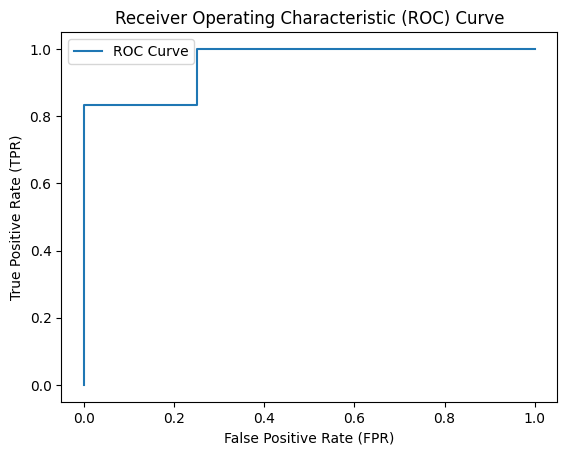

In [63]:
y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1])
y_pred_prob = np.array([0.1, 0.3, 0.2, 0.6, 0.4, 0.7, 0.2, 0.8, 0.9, 0.5])

tpr_list, fpr_list = calculate_roc_curve(y_true, y_pred_prob)

plt.plot(fpr_list, tpr_list, label='ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

b)  Plot the ROC curve

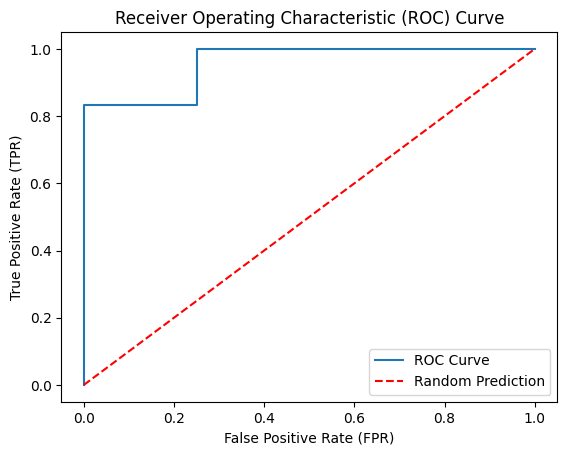

In [64]:
def plot_roc_curve_with_random(tpr_list, fpr_list):
    plt.plot(fpr_list, tpr_list, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Prediction')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve_with_random(tpr_list, fpr_list)

 C) On the same plot show the Random prediction plot (as a dotted line).

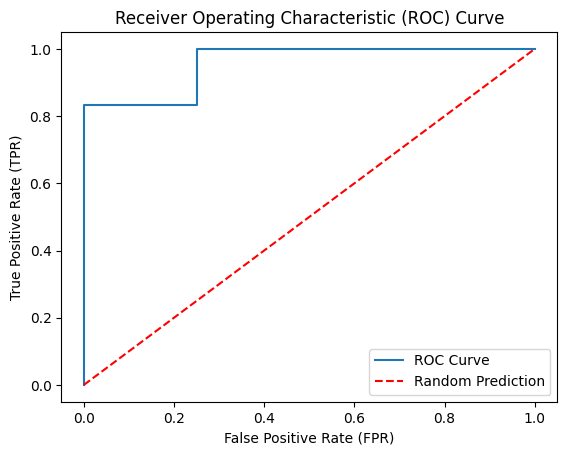

In [65]:
def plot_roc_curve_with_random(tpr_list, fpr_list):
    plt.plot(fpr_list, tpr_list, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Prediction')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1])
y_pred_prob = np.array([0.1, 0.3, 0.2, 0.6, 0.4, 0.7, 0.2, 0.8, 0.9, 0.5])

tpr_list, fpr_list = calculate_roc_curve(y_true, y_pred_prob)

plot_roc_curve_with_random(tpr_list, fpr_list)

# k-NN Classification:

Apply k-NN classifier on the same dataset, by choosing k = {1, 2, …, 10}. Use inbuilt sklearn function

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

k_values = range(1, 11)

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

for k, accuracy in zip(k_values, accuracy_scores):
    print(f"k = {k}, Accuracy = {accuracy}")

k = 1, Accuracy = 0.9666666666666667
k = 2, Accuracy = 0.9333333333333333
k = 3, Accuracy = 0.9333333333333333
k = 4, Accuracy = 0.8666666666666667
k = 5, Accuracy = 0.9
k = 6, Accuracy = 0.9
k = 7, Accuracy = 0.9333333333333333
k = 8, Accuracy = 0.9666666666666667
k = 9, Accuracy = 0.9
k = 10, Accuracy = 0.9


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

 For each value of k, obtain the precision, recall, and f1-score values.

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

for k, precision, recall, f1 in zip(k_values, precision_scores, recall_scores, f1_scores):
    print(f"k = {k}, Precision = {precision}, Recall = {recall}, F1-score = {f1}")

k = 1, Precision = 1.0, Recall = 0.9411764705882353, F1-score = 0.9696969696969697
k = 2, Precision = 1.0, Recall = 0.8823529411764706, F1-score = 0.9375
k = 3, Precision = 0.8947368421052632, Recall = 1.0, F1-score = 0.9444444444444444
k = 4, Precision = 0.8823529411764706, Recall = 0.8823529411764706, F1-score = 0.8823529411764706
k = 5, Precision = 0.8888888888888888, Recall = 0.9411764705882353, F1-score = 0.9142857142857143
k = 6, Precision = 0.9375, Recall = 0.8823529411764706, F1-score = 0.9090909090909091
k = 7, Precision = 0.8947368421052632, Recall = 1.0, F1-score = 0.9444444444444444
k = 8, Precision = 0.9444444444444444, Recall = 1.0, F1-score = 0.9714285714285714
k = 9, Precision = 0.85, Recall = 1.0, F1-score = 0.9189189189189189
k = 10, Precision = 0.85, Recall = 1.0, F1-score = 0.9189189189189189


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 